Custom notebook I did for the course "Fundamentals of Deep Reinforcement Learning" by LVx, as the original one is not available anymore on edX.

#PART 4 : Q Learning

In [1]:
import numpy as np

Here is the algorithm we will try to implement and apply to our previous environment : the 4 by 4 cell.

![](../pictures/shemas_4.png)

First, let's import the environement we already created in the previous notebook. It is better to use .py file for classes used in different notebook, but i hadn't planned to use it again ^^

In [2]:
from ipynb.fs.full.policy_iteration import environment # Just copy the "environment" class code from the notebook "policy_iteration" if this line does not work

# we create a new class that inherit the one we created, to add the tracking of the current state of the agent 
class Environment(environment):
    def __init__(self):
        super().__init__()
        self.current_state = 0

    def restart(self):
        self.current_state = np.random.randint(1, len(self.states) - 1)

    def get_state(self):
        return self.current_state
    
    def act(self, action):
        self.current_state, reward = super().act(self.current_state, action)
        return self.current_state, reward

Ok, now we can create our agent ! This time, I will include the action state value table in the agent classe

In [3]:
class agent():
    def __init__(self, list_states, list_actions, epsilon, alpha, gamma):
        self.Q = np.zeros([len(list_states), len(list_actions)])
        self.actions = list_actions
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
    
    def play(self, env):
        current_state = env.get_state()

        if np.random.uniform(0, 1) < self.epsilon:
            ind_action = np.random.choice(len(self.actions))
        else:
            ind_action = np.argmax(self.Q[current_state])
        
        next_state, reward = env.act(self.actions[ind_action])
        self.Q[current_state, ind_action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[current_state, ind_action])
    
    def play_episode(self, env):
        env.restart()
        while env.is_terminal_state(env.get_state()) == False:
            self.play(env)

    def get_Q(self):
        return self.Q

Now let's train this AI and visualize the progresses it makes

In [4]:
epsilon = 0.2
alpha = 0.2
gamma = 0.9

env = Environment()
Agent_ = agent(env.list_states(), ["left", "right", "up", "down"], epsilon, alpha, gamma)

number_episode = 100000

initial_Q = Agent_.get_Q().copy()

for i in range(number_episode//2):
    Agent_.play_episode(env)

middle_Q = Agent_.get_Q().copy()

for i in range(number_episode//2):
    Agent_.play_episode(env)

final_Q = Agent_.get_Q().copy()

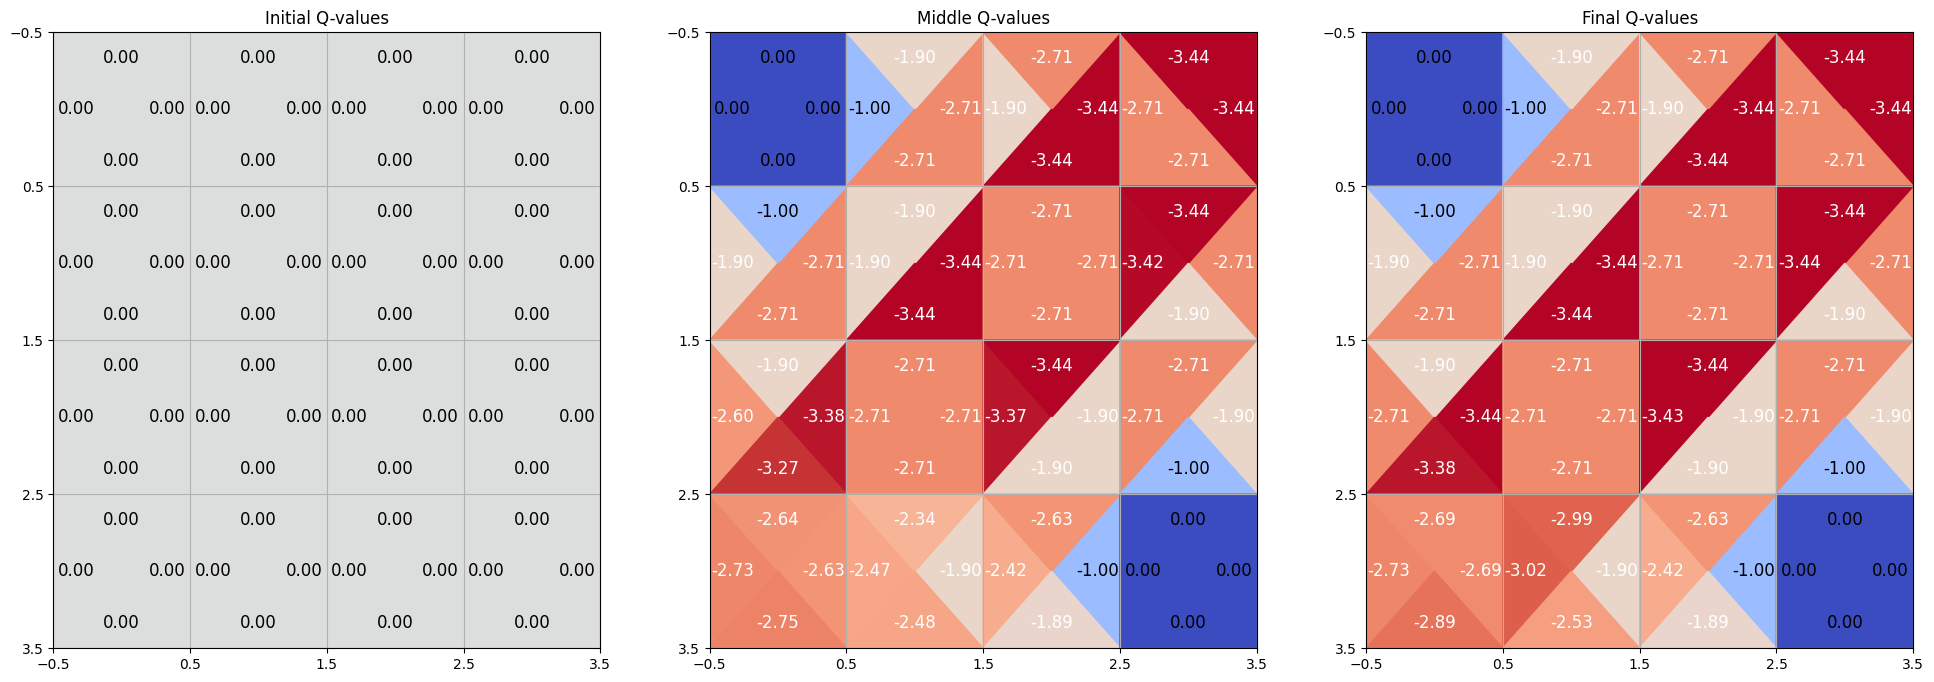

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_q_values(Q, ax, title="Q-values", cmap="coolwarm_r"):
    grid_size = int(np.sqrt(Q.shape[0]))
    
    vmin = np.min(Q)
    vmax = np.max(Q)
    
    for i in range(grid_size):
        for j in range(grid_size):
            state_index = i * grid_size + j
            q_values = Q[state_index]
            
            triangles = {
                "left": [(j, i), (j-0.5, i+0.5), (j-0.5, i-0.5)],
                "right": [(j, i), (j+0.5, i+0.5), (j+0.5, i-0.5)],
                "up": [(j, i), (j-0.5, i-0.5), (j+0.5, i-0.5)],
                "down": [(j, i), (j-0.5, i+0.5), (j+0.5, i+0.5)],
            }
            
            for k, (action, coords) in enumerate(triangles.items()):
                # Calculate the color intensity for the current Q value using coolwarm_r colormap
                normed_value = (q_values[k] - vmin) / (vmax - vmin) if vmax > vmin else 0.5
                color = plt.get_cmap(cmap)(normed_value)
                
                ax.fill(*zip(*coords), color=color)
                text_x, text_y = np.mean(coords, axis=0)
                
                text_color = "white" if normed_value < 0.5 else "black"
                ax.text(text_x, text_y, f"{q_values[k]:.2f}", ha='center', va='center', fontsize=12, color=text_color)
    
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size, 1))
    ax.set_yticks(np.arange(-0.5, grid_size, 1))
    ax.grid(True)
    ax.set_title(title)
    ax.invert_yaxis()

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

plot_q_values(initial_Q, axes[0], "Initial Q-values")
plot_q_values(middle_Q, axes[1], "Middle Q-values")
plot_q_values(final_Q, axes[2], "Final Q-values")

plt.show()
